In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
def make_graph(N, M, k, x, n,my,variance,std,flip):
    range_ = []
    data = []
    custom_color = []
    if flip:
        sum = 1-accu_hyper(N, M, k-1, x, n, False)
    else:
        sum = accu_hyper(N, M, k, x, n, False)
    length = find_length(N, M ,n)
    # Get data
    for i in range(0, length):
        data.append(single_hyper(N, M, i, n))
        range_.append(i)
        # Show highligthed colors
        if flip:
            if k <= i <= length:
                custom_color.append('green')
            else:
                custom_color.append('red')
        else:
            if x <= i <= k:
                custom_color.append('green')
            else:
                custom_color.append('red')
    # plotting chart
    plt.bar(range_, data, tick_label = range_,
            width = 0.7, color = custom_color)
    # Add numbers to bars
    for i in range(len(data)):
        if data[i] > 0.000009:
            plt.annotate(str(f'{data[i]:.5f}'), xy=(range_[i],data[i]), ha='center', va='bottom')
    # naming the x-axis
    if flip:
        plt.xlabel(f'P(x≥{k}): {sum:.4f} --- µ: {my:.4f} --- σ2: {variance:.4f} --- σ: {std:.4f}')
    else:
        plt.xlabel(f'P({x}≤X≤{k}): {sum:.4f} --- µ: {my:.4f} --- σ2: {variance:.4f} --- σ: {std:.4f}')
        
    # y-axis
    plt.ylabel(f'P(X=k)')
    # title
    plt.title('HyperGeometric distribution!')
    # show the plot
    plt.show()

In [4]:
def single_hyper(N, M, x, n):
    answer = (bi_co(M, x) * bi_co(N-M, n-x))/bi_co(N,n)
    return answer

In [5]:
def accu_hyper(N, M, k, x, n, steps):
    answer = 0
    for x in range (x ,k+1):
        new_answer = single_hyper(N, M, x, n)
        if steps:
            print(f'Probability of X = {x}: {new_answer:.5f}')
        answer += new_answer
    return answer

In [6]:
def find_length(N, M, n):
    steps = 0
    answer = 0
    while answer <= 0.99999:
        answer += single_hyper(N, M, steps, n)
        steps += 1
    return steps

In [7]:
# Calculate Binomial coefficient
def bi_co(top, bot):
    return math.factorial(top)/(math.factorial(bot) * math.factorial((top - bot)))

---------------HyperGeometric---------------
Expected value (µ): 0.23077 --- Variance (σ2): 0.20466 --- Standard deviation (σ): 0.45240
Probability of X = 1: 0.7826244343891403
Probability of X where 0 ≤ X ≤ 1: 0.9867873303167422
--------------------------------------------


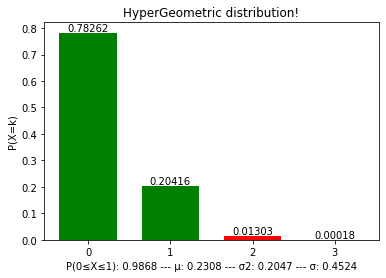

In [14]:

# EG. We have a deck of cards (N=52), where we pull out 3 (n) cards without putting them back.
# we want to pull out a picture card (M=16)
# N total
# M possible successes
# n how many draw out
# x-k range
N = 52
M = 4
n = 3
# From
x = 0
# To
k = 1
steps = True

my = n*(M/N)
variance = ((my*((N-M)/N))*((N-n)/(N-1)))
std = math.sqrt(variance)
flip = False

print('---------------HyperGeometric---------------')
print(f'Expected value (µ): {my:.5f} --- Variance (σ2): {variance:.5f} --- Standard deviation (σ): {std:.5f}')
print(f'Probability of X = {k}: {single_hyper(N, M, x, n)}')
if flip:
    print(f'Probability of X ≥ {k}: {1-accu_hyper(N, M, k-1, x, n, False)}')
else:
    print(f'Probability of X where {x} ≤ X ≤ {k}: {accu_hyper(N, M, k, x, n, False)}')
print('--------------------------------------------')
make_graph(N, M, k, x, n,my,variance,std,flip)